# Data Sources

Zhentao Shi

<!-- code is tested on SCRP -->

* Online archives
* API (Application Programming Interface)
* Proprietary data
* Survey data

## Public data

* Time Series
  - Natural ordering of observations
  - A single realization in history
  - eg. GDP, stock prices

* Microeconomic data
  - No natural ordering
  - Collected at the same time, or time does not matter
  - [Auction data](https://capcp.la.psu.edu/data-and-software/alaska-oil-and-gas-auction-data/)


* Aggregate panel data
  - [Penn World Table](https://www.rug.nl/ggdc/productivity/pwt/?lang=en)
  - [Atlas Trade Data](https://atlas.cid.harvard.edu/about-data)
  - [IMF databases](https://data.imf.org/?sk=388DFA60-1D26-4ADE-B505-A05A558D9A42&sId=1479329132316)


## Behind a Gate

* Applications needed
  * Chinese Longitudinal Healthy Longevity Survey [link](https://www.icpsr.umich.edu/web/NACDA/studies/36692)
  * China Household Finance Survey [link](https://chfs.swufe.edu.cn/)


## CUHK Library

* [Refinitiv](http://easyaccess1.lib.cuhk.edu.hk/limited/refinitiv.html)
* [WRDS](http://easyaccess1.lib.cuhk.edu.hk/limited/wrds.htm)
* [CEIC](https://cas-ceicdata-com.easyaccess1.lib.cuhk.edu.hk/login#)


## Econ Department

* WIND
* CEIC
* Bloomberg
* China Census

library(magrittr)
library(dplyr)
library(zoo)
library(rvest)
library(Quandl)


## Time Series

- Macroeconomics
  - 国家统计局 [National Bureau of Statistics](https://data.stats.gov.cn/easyquery.htm?cn=B01)
  - Federal Reserve [FRED database](https://research.stlouisfed.org/econ/mccracken/fred-databases/)
- Financial
  - [Yahoo Finance](https://finance.yahoo.com/)

## HK GDP

* [Census and Statistics Department](https://www.censtatd.gov.hk/en/web_table.html?id=33#)
  * Webpage With API

In [ ]:
library(httr)
library(jsonlite)
library(rjson)

url <- "https://www.censtatd.gov.hk/api/get.php?id=33&lang=en&param=N4IgxgbiBcoMJwJqJqAjDEAGHu+4HZ9iScQAaEAfQBcrMsLqAHe6bEAX0oEVUQM7AGJNabDpSqsGXSgHEAIgAUqYAPYBbZmoB2AUx01+AJkwF6kujMnT2GTtxABnKLBbjTlOAHkAcjABtEAAlAEMAdyoAWSoACwBrABMqRKZENUQqNETWAFIqHRAAXUcAGxgaACcAVz1OIA"
download.file(url, destfile="input.json")
result <- jsonlite::fromJSON("input.json")

data.frame(result$dataSet)

## Federal Reserve

* China GDP [[link](https://fred.stlouisfed.org/series/MKTGDPCNA646NWDB)]

[1] "MKTGDPCNA646NWDB"

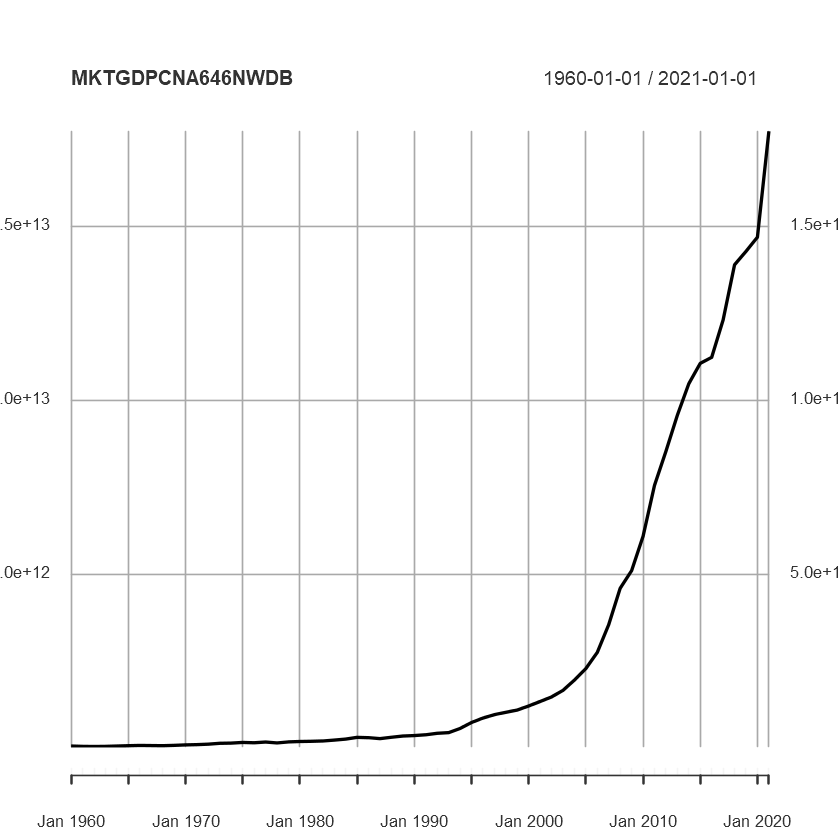

In [3]:
quantmod::getSymbols.FRED(Symbols = "MKTGDPCNA646NWDB", env = .GlobalEnv) 
plot(MKTGDPCNA646NWDB)


Another example: [Quarterly US Industrial Production Index](https://fred.stlouisfed.org/series/IPB50001SQ)


[1] "IPB50001SQ"

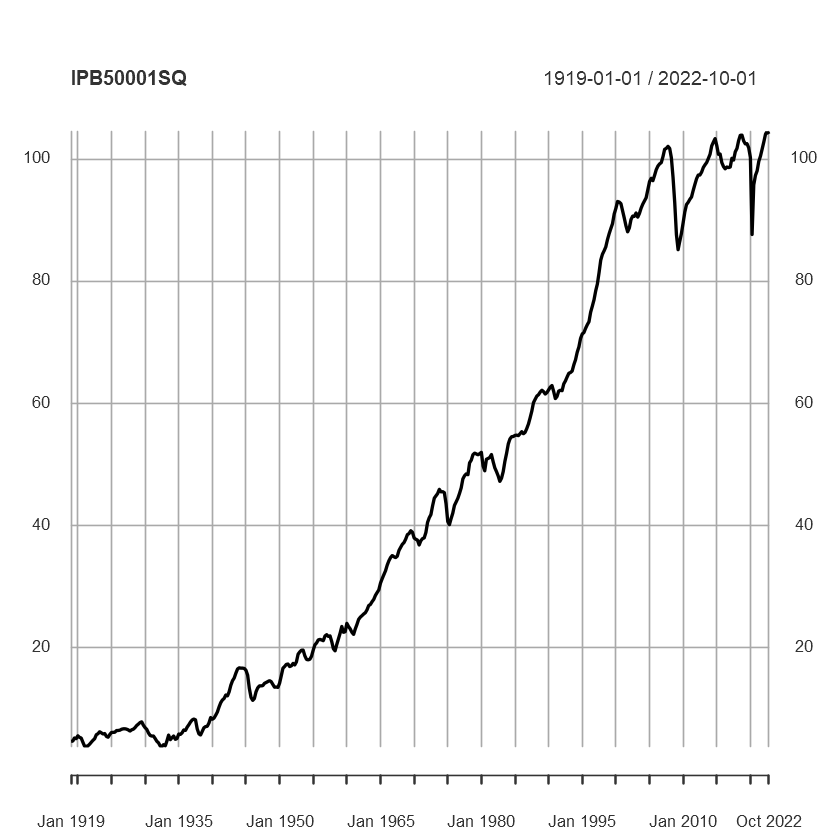

In [ ]:
quantmod::getSymbols.FRED(Symbols = c("IPB50001SQ"), env = .GlobalEnv)
plot(IPB50001SQ)

## Finance Data


* [Yahoo Finance](https://finance.yahoo.com/)

* Tick `AAPL` for *Apple Inc.* 
  * Package `quantmod`

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "AAPL"

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2023-01-12    133.88    134.26   131.44     133.41    71379600        133.41
2023-01-13    132.03    134.92   131.66     134.76    57758000        134.76
2023-01-17    134.83    137.29   134.13     135.94    63646600        135.94
2023-01-18    136.82    138.61   135.03     135.21    69672800        135.21
2023-01-19    134.08    136.25   133.77     135.27    58280400        135.27
2023-01-20    135.28    138.02   134.22     137.87    79972200        137.87

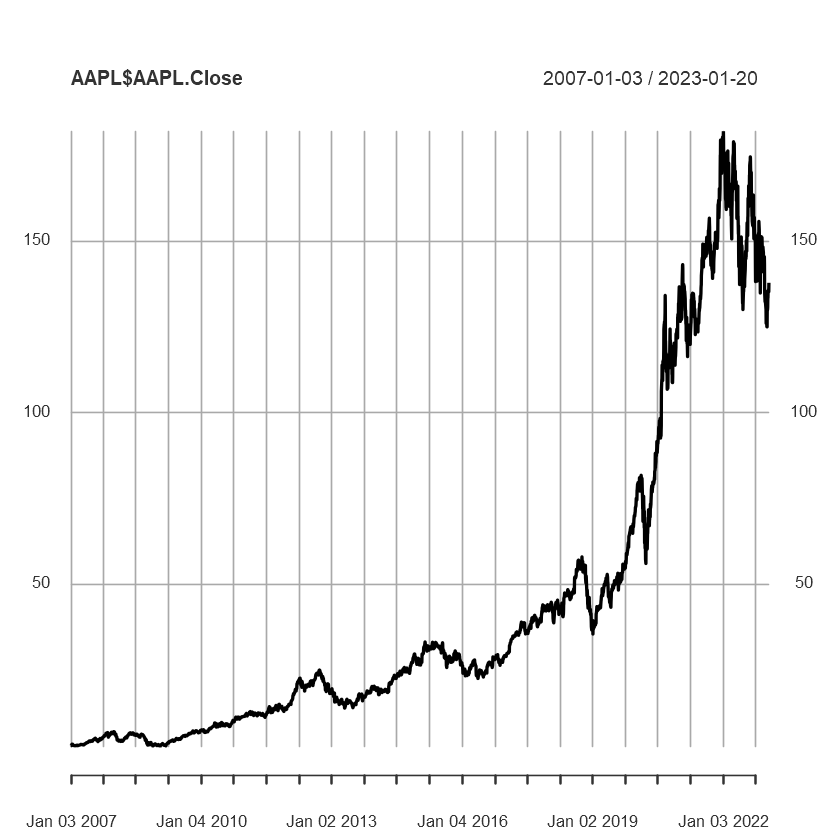

In [1]:
quantmod::getSymbols("AAPL", src = "yahoo")
tail(AAPL)
plot(AAPL$AAPL.Close)

### Shanghai Composite Index

Warning message:
"000001.SS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."


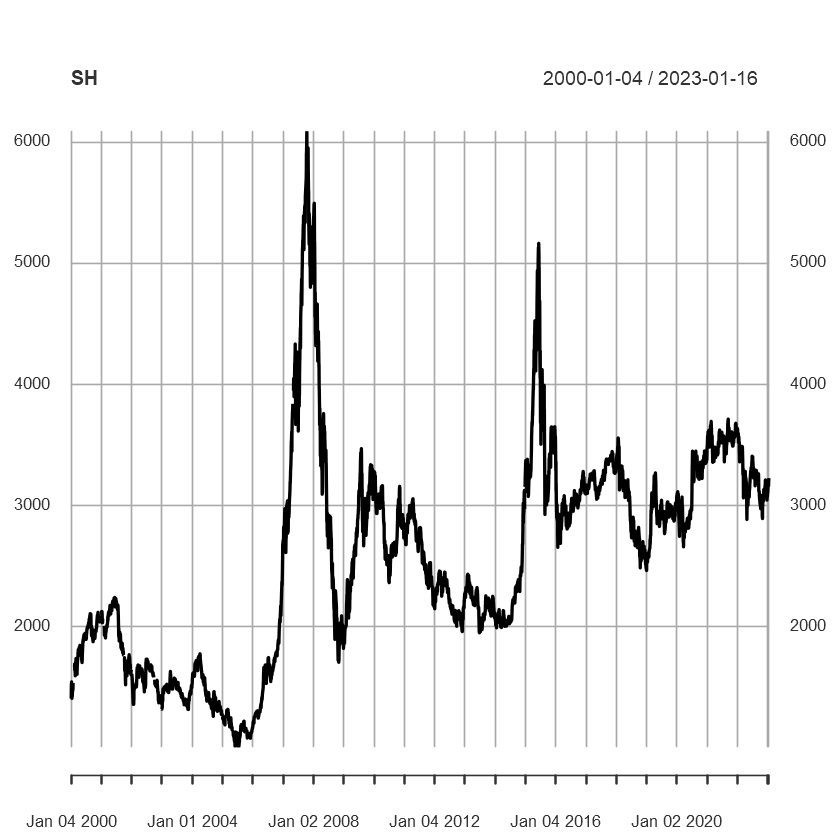

In [3]:
tick = "000001.SS" # need to find the tick 
SH <- quantmod::getSymbols(tick, auto.assign = FALSE, 
         from = "2000-01-01")[, paste0(tick,".Close")]

plot(SH)

### 000001.SS Return

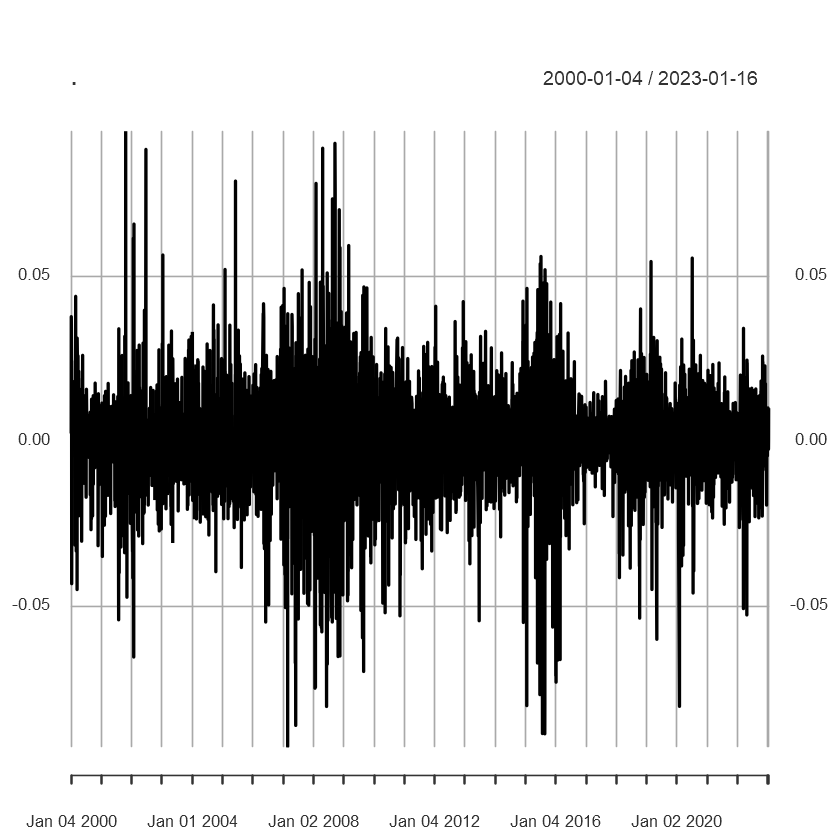

In [4]:
diff(log(SH)) %>% plot

### Bitcoin

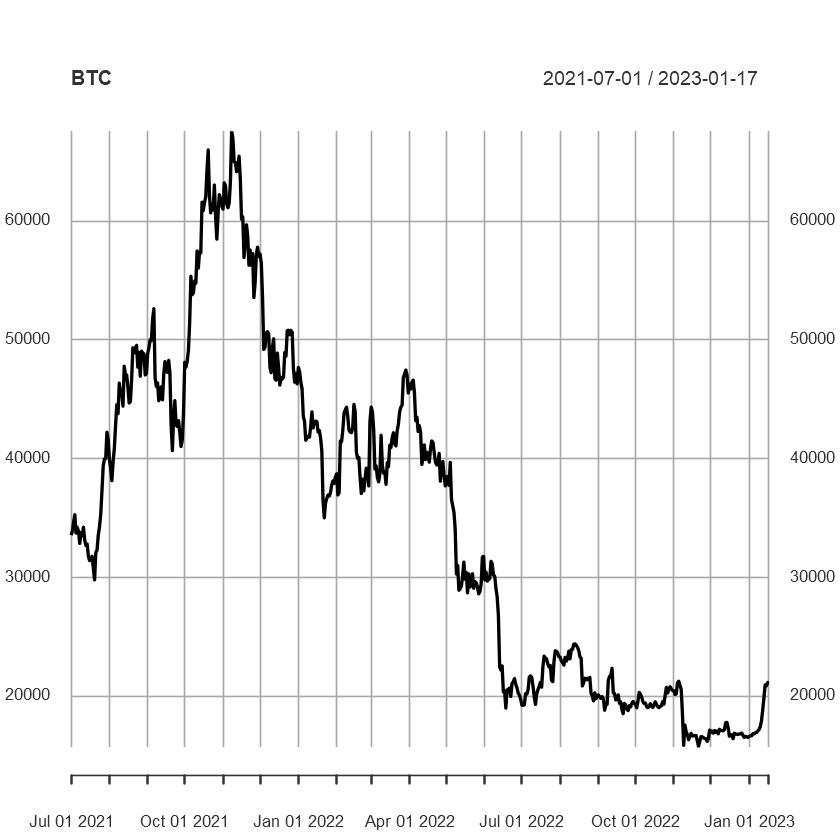

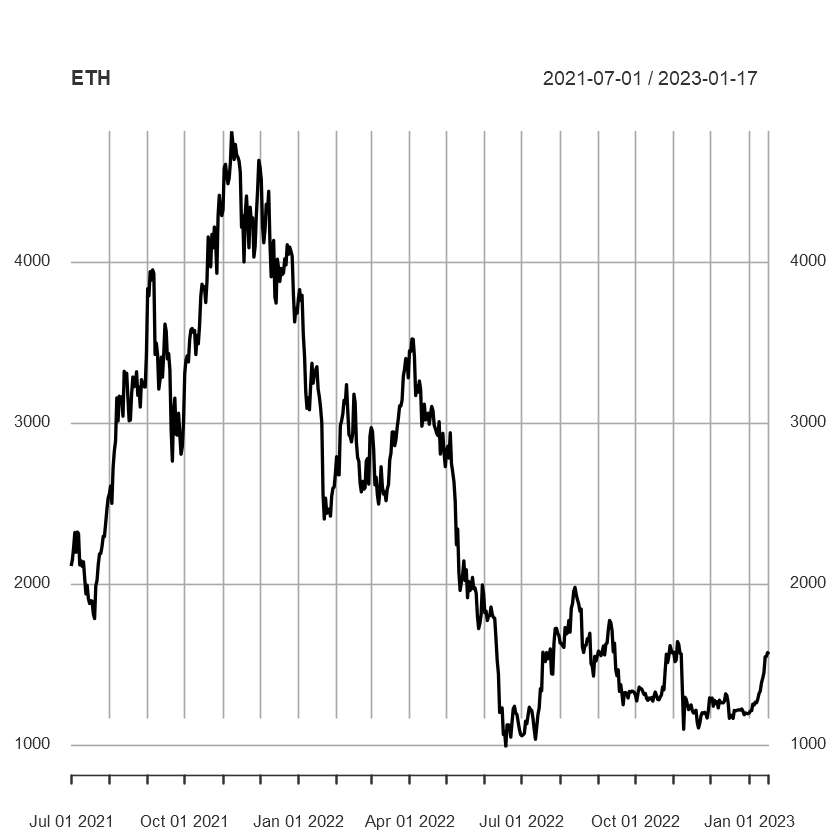

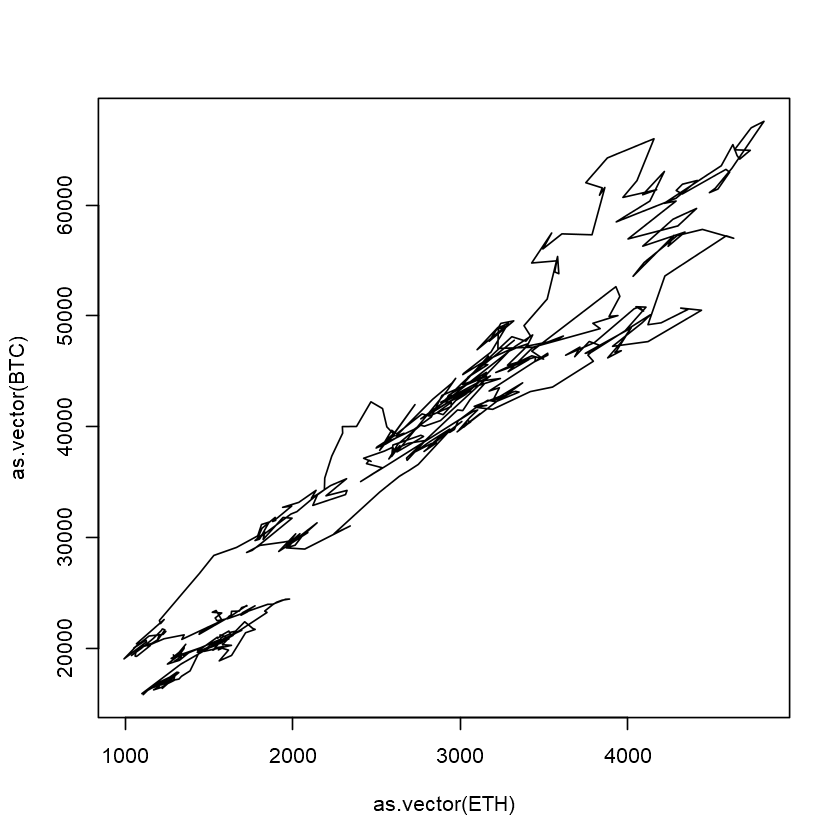

In [5]:
BTC <- quantmod::getSymbols("BTC-USD",auto.assign = FALSE, from = "2021-07-01")[,4]
plot(BTC)

ETH <- quantmod::getSymbols("ETH-USD",auto.assign = FALSE, from = "2021-07-01")[,4]
plot(ETH)

plot( x = as.vector(ETH), y = as.vector(BTC), type = "l")

### Bitcoin return

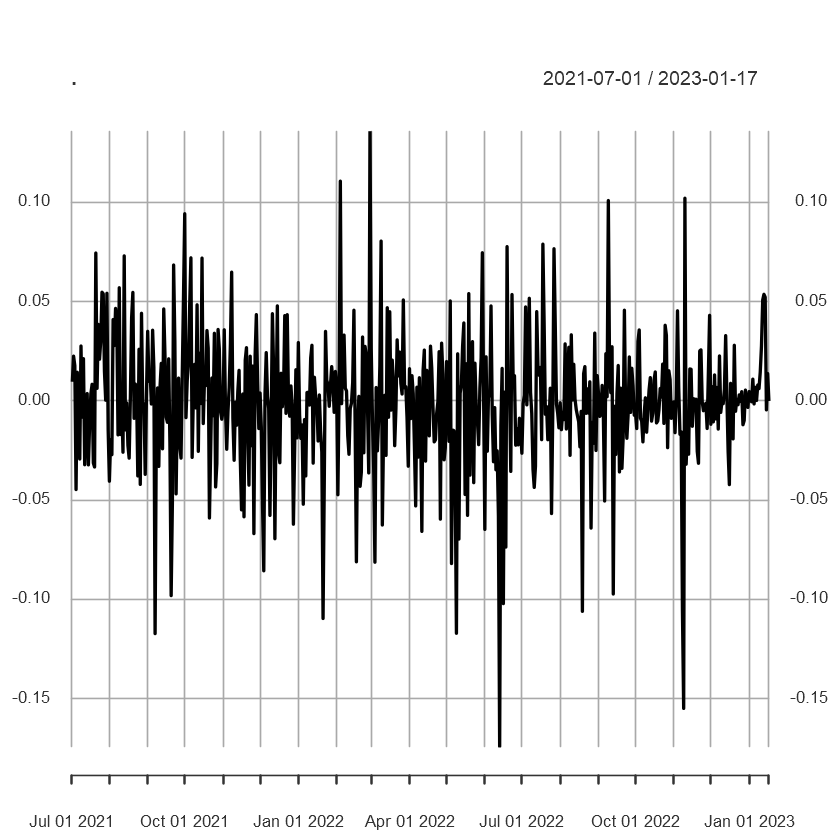

In [6]:
diff( log(BTC) ) %>% plot( )

## Repeated Data Download

* Example: HKMA [API](https://apidocs.hkma.gov.hk/documentation/market-data-and-statistics/daily-monetary-statistics/daily-figures-interbank-liquidity/)
  * Save as a csv file
  * Repeat the regular job via `cron` in Linux
  * `cronR` provides an R interface to `cron`

In [ ]:
library(httr)
library(jsonlite)
library("rjson")
url <- "https://api.hkma.gov.hk/public/market-data-and-statistics/daily-monetary-statistics/daily-figures-interbank-liquidity"
download.file(url,destfile="input.json")
result <- jsonlite::fromJSON("input.json")
hkma <- data.frame(result$result)
write.csv(hkma,"hkma.csv")



```
library("cronR")
# This is to list all the tasks before
cron_ls()
# This is to clear all the tasks
# you can choose not to run this line
cron_clear(ask = "FALSE")
# This means the crontab will run an R script 
# and the output will be in the /root/filename.txt
cmd <- cron_rscript("HKMA_API.r", rscript_log = "/root/HKMAdata.ctxt")
# This means the download happens every day ("daily") with the defined id
cron_add(cmd,frequency="daily",ask = "FALSE", id = "zt_econ5821")
```

## Access Database

* API for CEIC

```
# Dai Qiyu (Jan, 2023)

PackageList=c("R6","xml2","zoo","httr","getPass") 
lapply(PackageList, require, character.only=TRUE)

install.packages ("ceic", repos = "https://downloads.ceicdata.com/R/", 
                  type = "source")
library(ceic)

#log in
ceic.login(username="cuhk_student_id@link.cuhk.edu.hk",
           password="your_password")


#Step 2: obtain China's quarterly GDP-----------------------------------------------
CN_GDP_list=
  ceic.series(c("2609f72b-16b5-4799-a347-35d8ac05e585"), format = "ts", 
              lang = "zh")
CN_GDP=CN_GDP_list$timepoints
CN_GDP


#Finally, logout--------------------------------------------------------------------
ceic.logout()
```

### Bank Marketing Data

* S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.



* Direct marketing campaigns of a Portuguese banking institution. 

*  **Data Import**: `readr::read_dim`

In [5]:
library(tidyverse)

# `readr` packages has more flexible functions to import data
d0 = readr::read_delim("data_example/bank-full.csv", delim = ";", col_names = TRUE,
                       col_types = cols(
                         age = "i",
                         job = "c",
                         marital = "f",
                         education = "f",
                         balance = "i",
                         )
                       )

head(d0)
colnames(d0)


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<int>,<chr>,<fct>,<fct>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


[1] "age"       "job"       "marital"   "education" "default"   "balance"  
 [7] "housing"   "loan"      "contact"   "day"       "month"     "duration" 
[13] "campaign"  "pdays"     "previous"  "poutcome"  "y"

## Data Transformation

* `filter`
* `select`
* `arrange`
* `mutate`

In [6]:
# select columns
d1 = select(d0, age:loan)
head(d1)

age,job,marital,education,default,balance,housing,loan
<int>,<chr>,<fct>,<fct>,<chr>,<int>,<chr>,<chr>
58,management,married,tertiary,no,2143,yes,no
44,technician,single,secondary,no,29,yes,no
33,entrepreneur,married,secondary,no,2,yes,yes
47,blue-collar,married,unknown,no,1506,yes,no
33,unknown,single,unknown,no,1,no,no
35,management,married,tertiary,no,231,yes,no


In [7]:
# select a subset by conditions
filter(d1, job == "blue-collar", age > 50) 
filter(d1, job == "blue-collar", (age > 20 & age <= 30) ) 

age,job,marital,education,default,balance,housing,loan
<int>,<chr>,<fct>,<fct>,<chr>,<int>,<chr>,<chr>
57,blue-collar,married,primary,no,52,yes,no
59,blue-collar,married,secondary,no,0,yes,no
60,blue-collar,married,unknown,no,104,yes,no
54,blue-collar,married,secondary,no,1291,yes,no
57,blue-collar,married,primary,no,249,yes,no
57,blue-collar,married,secondary,no,5935,yes,yes
55,blue-collar,married,primary,no,23,yes,no
51,blue-collar,married,primary,no,173,yes,no
60,blue-collar,married,unknown,no,54,yes,no


age,job,marital,education,default,balance,housing,loan
<int>,<chr>,<fct>,<fct>,<chr>,<int>,<chr>,<chr>
28,blue-collar,married,secondary,no,723,yes,yes
25,blue-collar,married,secondary,no,-7,yes,no
23,blue-collar,married,secondary,no,94,yes,no
28,blue-collar,married,primary,no,324,yes,no
22,blue-collar,single,secondary,no,0,yes,no
30,blue-collar,single,secondary,no,0,yes,no
30,blue-collar,single,secondary,no,-457,yes,no
29,blue-collar,married,secondary,no,1,yes,no
30,blue-collar,divorced,secondary,no,-209,yes,no


In [8]:
# (re)arrange rows
arrange(d1, age, education)
arrange(d1, desc(age), education)

age,job,marital,education,default,balance,housing,loan
<int>,<chr>,<fct>,<fct>,<chr>,<int>,<chr>,<chr>
18,student,single,secondary,no,5,no,no
18,student,single,secondary,no,156,no,no
18,student,single,unknown,no,108,no,no
18,student,single,unknown,no,35,no,no
18,student,single,unknown,no,3,no,no
18,student,single,unknown,no,108,no,no
18,student,single,unknown,no,108,no,no
18,student,single,unknown,no,348,no,no
18,student,single,unknown,no,438,no,no


age,job,marital,education,default,balance,housing,loan
<int>,<chr>,<fct>,<fct>,<chr>,<int>,<chr>,<chr>
95,retired,married,secondary,no,0,no,no
95,retired,divorced,primary,no,2282,no,no
94,retired,divorced,secondary,no,1234,no,no
93,retired,married,unknown,no,775,no,no
93,retired,married,unknown,no,775,no,no
92,retired,married,unknown,no,775,no,no
92,retired,married,unknown,no,775,no,no
90,retired,divorced,secondary,no,1,no,no
90,retired,divorced,primary,no,712,no,no


In [9]:
# add generated columns (last column)
mutate(d1, edu_f = as.numeric(education) )
transmute(d1, 
          age = age,
          marital = as.numeric(marital), 
          education = as.numeric(education))


age,job,marital,education,default,balance,housing,loan,edu_f
<int>,<chr>,<fct>,<fct>,<chr>,<int>,<chr>,<chr>,<dbl>
58,management,married,tertiary,no,2143,yes,no,1
44,technician,single,secondary,no,29,yes,no,2
33,entrepreneur,married,secondary,no,2,yes,yes,2
47,blue-collar,married,unknown,no,1506,yes,no,3
33,unknown,single,unknown,no,1,no,no,3
35,management,married,tertiary,no,231,yes,no,1
28,management,single,tertiary,no,447,yes,yes,1
42,entrepreneur,divorced,tertiary,yes,2,yes,no,1
58,retired,married,primary,no,121,yes,no,4


age,marital,education
<int>,<dbl>,<dbl>
58,1,1
44,2,2
33,1,2
47,1,3
33,2,3
35,1,1
28,2,1
42,3,1
58,1,4


## Summarize

* `group_by`

In [10]:

# overall mean balance 
summarize(d1, mean_b = mean(balance))


mean_b
<dbl>
1362.272


In [11]:

# mean balance by groups
group_by(d1, education) %>%
  summarize( mean_b = mean(balance))


education,mean_b
<fct>,<dbl>
tertiary,1758.416
secondary,1154.881
unknown,1526.754
primary,1250.950


In [12]:

d1 %>%
  group_by(education, marital) %>%
  summarize( mean_b = mean(balance),
             sd_b = sd(balance),
             count = n())



`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


education,marital,mean_b,sd_b,count
<fct>,<fct>,<dbl>,<dbl>,<int>
tertiary,married,1848.7793,3937.521,7038
tertiary,single,1643.3512,3545.187,4792
tertiary,divorced,1700.9171,4252.287,1471
secondary,married,1251.7503,2756.506,13770
secondary,single,1060.5468,2288.492,6617
secondary,divorced,902.7726,2082.642,2815
unknown,married,1557.7879,3348.603,1160
unknown,single,1493.6572,2987.710,528
unknown,divorced,1417.1479,2096.269,169


## Data Scrapping


* [Liangjia Shenzhen data](https://github.com/ishwang1/Shenzhen-Housing/tree/main/Scraper) (by Wang Yishu)
* We can test it on SCRP.

## Reading

* Wickham and Grolemund](https://r4ds.had.co.nz/)
  * Ch.10: tibbles
  * Ch.11: data import
  * Ch.5:  data transformation
  * Ch.18: pipes
